<a href="https://colab.research.google.com/github/PratibhaPachare/TASK-6/blob/main/TASK6_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)



In [ ]:
# Import necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas.util.testing as tm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.feature_selection import RFE

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/CSV FILES/TASK6/car_data.csv")
df.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [ ]:
# Number of rows and columns in the dataframe.
df.shape

(804, 12)

In [ ]:
# Checking for missing values.
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
# Getting information about the dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)



In [ ]:
X = df.Mileage # feature
y = df.Price  # target

# Splitting the data into training and testing datasets.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Converting feature and target into arrays(feature --> 2D)
X_train_re = X_train.values.reshape(-1,1)
X_test_re = X_test.values.reshape(-1,1)
y_train_re = y_train.values
y_test_re = y_test.values

# Fitting the Model
reg = linear_model.LinearRegression().fit(X_train_re, y_train_re)
print("Regression Coefficient/Slope: ", reg.coef_[0])
print("Regression Constant/Intercept: ", reg.intercept_)
print(f"\nEquation of the best fit line: \nPrice = {(reg.intercept_):.4f} + {(reg.coef_[0]):.4f} * Mileage")
r_sq = reg.score(X_test_re, y_test_re)
print('\nR^2 --> Coefficient of Determination:', round(r_sq,3))

Regression Coefficient/Slope:  -0.15780200314519227
Regression Constant/Intercept:  24513.21955895653

Equation of the best fit line: 
Price = 24513.2196 + -0.1578 * Mileage

R^2 --> Coefficient of Determination: 0.029


The model's R2 score is 0.029.As the equation's R2 score is less than 0.8, equation is not a good fit for this data.Also, the 'mileage' feature alone may not be sufficient to predict the car prices.

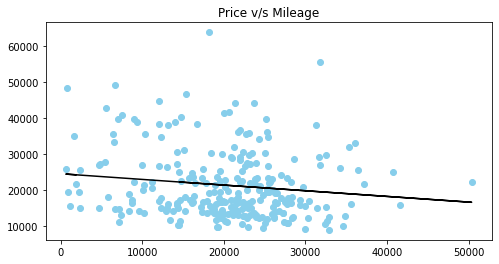

In [ ]:
#"Price v/s Mileage"
plt.figure(figsize=(8,4))
plt.title("Price v/s Mileage",fontsize=12) 
y_pred = reg.predict(X_test_re)
plt.scatter(X_test, y_test, color ='skyblue')
plt.plot(X_test, y_pred, color ='k')  
plt.show()


## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.



In [ ]:
# List of all the columns present in the DataFrame.
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [ ]:
# Extract all the numeric (float and int type) columns from the dataset.
numeric_df = df.select_dtypes(include = ['int64', 'float64'])
features = list(numeric_df.drop("Price", axis=1).columns)
X = df[features] # feature variables
y = df.Price  # target

# Splitting the data into training and testing datasets.
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Build linear regression model 
mlr = linear_model.LinearRegression().fit(X_train, y_train)

# Print the value of the intercept 
print(f"Regression Constant/Intercept:\n{mlr.intercept_}")

# Print the names of the features along with the values of their corresponding coefficients.
print("\nRegression Coefficients: ")
for item in list(zip(X_train.columns.values, mlr.coef_)):
  print(f"{item[0]} : {item[1]}") 

Regression Constant/Intercept:
5451.918900935012

Regression Coefficients: 
Mileage : -0.16155808511525482
Cylinder : 5199.588307392029
Liter : -2561.251268659723
Doors : -1848.8894993867916
Cruise : 6504.310590337699
Sound : -1884.8581242053538
Leather : 3345.058962411629


In [ ]:
# R2 score
r_sq2 = mlr.score(X_test, y_test)
print('R^2 --> Coefficient of Determination:', round(r_sq2,3))

R^2 --> Coefficient of Determination: 0.415


The model's R2 score is 0.415. As the equation's R2 score is less than 0.8, equation is not a good fit for this data.

In [ ]:
# Prediction with test set
y_pred_mlr= mlr.predict(X_test)
# Find the columns with the best R2 score
r = np.array([df[i].corr(df["Price"]) for i in features])
r2 = r**2
df_r2 = pd.DataFrame({'feature':features,"r2_squared":r2})
df_r2.sort_values(by="r2_squared", ascending=False)

,feature,r2_squared
1,Cylinder,0.323859
2,Liter,0.311527
4,Cruise,0.185633
6,Leather,0.024711
0,Mileage,0.020463
3,Doors,0.019251
5,Sound,0.015462


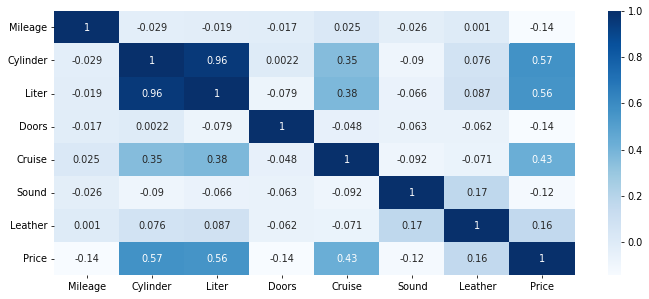

In [ ]:
# Drawing a correlation heatmap between the numeric features.
corr_df = df[features+["Price"]].corr()
plt.figure(figsize = (12, 5), dpi = 70)
sns.heatmap(corr_df, cmap="Blues", annot = True)
plt.show()

The dependent variable, 'Price' has a moderate correlation with 3 features, 'Cylinder', 'Liter' and 'Cruise'.
But 'Cylinder' and 'Liter' are strongly related to each other(R = 0.96), so only one among them can be considered to build the model. As 'Cylinder' is relatively more correlated with 'Price' variable, we will not consider 'Liter' for building the model.

'Cruise' is weak to moderately related with 'Liter' and 'Cylinder'. We shall ignore 'Liter'as we are not taking that feature into consideration. Among 'Cruise' and 'Cylinder, 'Cylinder' is relatively more related to 'Price'. So, we will omit 'Cruise' as well.

Final Thoughts: The features that can be included in building the model would be Cylinder , Doors , Mileage , Leather , Sound.



## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [ ]:
# Getting the information on the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [ ]:
# Creating a DataFrame containing all the non-numeric type features except 'Trim'.
cat_df = df.select_dtypes(include = ['object'])
cat_df=cat_df.drop("Trim", axis=1)
cat_df.head()

,Make,Model,Type
0,Buick,Century,Sedan
1,Buick,Century,Sedan
2,Buick,Century,Sedan
3,Buick,Century,Sedan
4,Buick,Century,Sedan


In [ ]:
# Getting the count of each of the values in the 'Make' column.
cat_df["Make"].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [ ]:
# Getting the count of each of the values in the 'Model' column.
cat_df["Model"].value_counts()

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64

In [ ]:
# Getting the count of each of the values in the 'Type' column.
cat_df["Type"].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [ ]:
# Get dummy variables for all the columns in cat_df DataFrame using the dummy coding process.
dummies_df = pd.get_dummies(cat_df, drop_first = True, dtype = int)
dummies_df.head()

,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9_3,Model_9_3 HO,Model_9_5,Model_9_5 HO,Model_AVEO,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Concatenate the DataFrames together.
cars_df = pd.concat([df[features], dummies_df], axis = 1)
cars_df.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Make_Cadillac,Make_Chevrolet,Make_Pontiac,...,Model_Park Avenue,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,8221,6,3.1,4,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9135,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13196,6,3.1,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,16342,6,3.1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,19832,6,3.1,4,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Get the data-types of all the columns and the number of rows and columns in the 'cars_df' DataFrame.
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mileage            804 non-null    int64  
 1   Cylinder           804 non-null    int64  
 2   Liter              804 non-null    float64
 3   Doors              804 non-null    int64  
 4   Cruise             804 non-null    int64  
 5   Sound              804 non-null    int64  
 6   Leather            804 non-null    int64  
 7   Make_Cadillac      804 non-null    int64  
 8   Make_Chevrolet     804 non-null    int64  
 9   Make_Pontiac       804 non-null    int64  
 10  Make_SAAB          804 non-null    int64  
 11  Make_Saturn        804 non-null    int64  
 12  Model_9_3          804 non-null    int64  
 13  Model_9_3 HO       804 non-null    int64  
 14  Model_9_5          804 non-null    int64  
 15  Model_9_5 HO       804 non-null    int64  
 16  Model_AVEO         804 non

In [ ]:
# Function to build a Linear Regression Model and calculate the R_squared Score & errors.
def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    mlr2=linear_model.LinearRegression().fit(X_train, y_train)
    y_hat_test = mlr2.predict(X_test)
    y_hat_train = mlr2.predict(X_train)
    print('R_squared Score:', mlr2.score(X, y))

    print(f"\nTrain Set\n{'-' * 50}")
    print(f"Mean Squared Error: {mean_squared_error(y_train, y_hat_train):.3f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_hat_train)):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_hat_train):.3f}")
          
    print(f"\n\nTest Set\n{'-' * 50}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_hat_test):.3f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_hat_test)):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_hat_test):.3f}")

    #Compare predicted and actual values
    print(f"\n{'-' * 50}")
    print('Mean Predicted Selling Price:', y_hat_test.mean())
    print('Mean Selling Price:', y_test.mean())
    print()
    return mlr2

mlr2 = lin_reg(cars_df,df["Price"])


R_squared Score: 0.9800934429570178

Train Set
--------------------------------------------------
Mean Squared Error: 1979679.764
Root Mean Squared Error: 1407.011
Mean Absolute Error: 1056.471


Test Set
--------------------------------------------------
Mean Squared Error: 1867775.491
Root Mean Squared Error: 1366.666
Mean Absolute Error: 1055.359

--------------------------------------------------
Mean Predicted Selling Price: 21457.5414164283
Mean Selling Price: 21522.431182367993



In [ ]:
# Function to do cross validation.
def cross_validation(X, y):
    score = cross_val_score(mlr2, X, y,cv=5, scoring="r2")
    print('R_squared Mean Score:',score.mean())
    print(score)
cross_validation(cars_df,df["Price"])

R_squared Mean Score: -0.7036244105430352
[-0.40664314 -4.6553517   0.58913472  0.38232551  0.57241256]


In [ ]:
# Total number of features initially
cars_df.shape[1]

47

In [ ]:
estimator = SVR(kernel="linear")
# Use RFE to remove not so significant features from the initial model.
selector = RFE(estimator, n_features_to_select=36, step=1)
selector = selector.fit(cars_df,df["Price"])
# Test the  new model
# New dataframe contains only features selected through RFE (Recursive Feature Elimination)
df_rfe = cars_df[cars_df.columns[selector.support_]]
lin_reg(df_rfe,df["Price"])
cross_validation(df_rfe,df["Price"])

R_squared Score: 0.9572592071626542

Train Set
--------------------------------------------------
Mean Squared Error: 4091148.343
Root Mean Squared Error: 2022.659
Mean Absolute Error: 1455.432


Test Set
--------------------------------------------------
Mean Squared Error: 4332571.060
Root Mean Squared Error: 2081.483
Mean Absolute Error: 1624.840

--------------------------------------------------
Mean Predicted Selling Price: 21558.63793181894
Mean Selling Price: 21718.486809342918

R_squared Mean Score: 0.3989695599827502
[-0.10215831  0.00872082  0.87194053  0.70885163  0.50749314]


In [ ]:
# Features which were selected.
f=[]
x = dict(zip(cars_df.columns,selector.ranking_))
for i in x:
  if x[i] == 1:
    f.append(i)
np.array(f)

array(['Cylinder', 'Liter', 'Cruise', 'Sound', 'Make_Cadillac',
       'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO',
       'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS',
       'Model_Cavalier', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_Grand Am', 'Model_Ion',
       'Model_Lacrosse', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8',
       'Model_Sunfire', 'Model_Vibe', 'Type_Coupe', 'Type_Hatchback',
       'Type_Sedan', 'Type_Wagon'], dtype='<U17')

In [ ]:
# Number of features selected
len(f)

36

In [ ]:
def sm_reg(X,y):    
    # Splitting the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42) 
    # Test set will have 33% of the values.

    # Add a constant to get an intercept
    X_train_sm = sm.add_constant(X_train)

    # Fit the regression line using 'OLS'
    lr = sm.OLS(y_train, X_train_sm).fit()

    # Performing a summary operation lists out all the different parameters of the regression line fitted
    print(lr.summary())

sm_reg(cars_df[f],df["Price"])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     340.1
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:50:03   Log-Likelihood:                -4853.5
No. Observations:                 538   AIC:                             9781.
Df Residuals:                     501   BIC:                             9940.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.218e+04   1882.18

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Although, R² decreased from 97.97% to 95.61% the model is comparitively more robust with a positive cross-validation result.But when we observe the above summary, p values of certain columns are more than 0.05. We will have to remove them.

In [ ]:
# Removing columns with p values greater than 0.05
remove_f = ["Cruise","Sound", "Make_Chevrolet",'Make_Pontiac','Model_Cavalier', 'Model_Cobalt',
            'Model_Grand Am','Model_Ion','Model_Malibu','Model_Sunfire','Model_Monte Carlo']
for i in remove_f:
  f.remove(i)
lin_reg(cars_df[f],df["Price"])
cross_validation(cars_df[f],df["Price"])

R_squared Score: 0.9556046090394714

Train Set
--------------------------------------------------
Mean Squared Error: 4173770.700
Root Mean Squared Error: 2042.981
Mean Absolute Error: 1549.215


Test Set
--------------------------------------------------
Mean Squared Error: 4653515.529
Root Mean Squared Error: 2157.201
Mean Absolute Error: 1546.569

--------------------------------------------------
Mean Predicted Selling Price: 20842.858987577318
Mean Selling Price: 20937.66300176353

R_squared Mean Score: 0.3528911735264213
[-0.44820719  0.19702271  0.80679188  0.6791114   0.52973707]


In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
sm_reg(cars_df[f],df["Price"])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     481.9
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:51:29   Log-Likelihood:                -4863.3
No. Observations:                 538   AIC:                             9779.
Df Residuals:                     512   BIC:                             9890.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.189e+04    986.45

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Removing columns with p values greater than 0.05
remove_f = ['Make_Saturn','Model_Bonneville']
for i in remove_f:
  f.remove(i)
lin_reg(cars_df[f],df["Price"])
cross_validation(cars_df[f],df["Price"])

R_squared Score: 0.955225371959825

Train Set
--------------------------------------------------
Mean Squared Error: 4389662.725
Root Mean Squared Error: 2095.152
Mean Absolute Error: 1580.150


Test Set
--------------------------------------------------
Mean Squared Error: 4328724.387
Root Mean Squared Error: 2080.559
Mean Absolute Error: 1525.979

--------------------------------------------------
Mean Predicted Selling Price: 20913.040010809
Mean Selling Price: 20802.22608514422

R_squared Mean Score: 0.3606630677561757
[-0.38852179  0.13348141  0.80596153  0.72275858  0.5296356 ]


In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
sm_reg(cars_df[f],df["Price"])

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     520.0
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        13:52:16   Log-Likelihood:                -4866.1
No. Observations:                 538   AIC:                             9780.
Df Residuals:                     514   BIC:                             9883.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.184e+04    960.80

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
print("Features selected are:\n\n",np.array(f))
print(f"\nNumber of Features = {len(f)}")

Features selected are:

 ['Cylinder' 'Liter' 'Make_Cadillac' 'Make_SAAB' 'Model_9_3' 'Model_9_3 HO'
 'Model_9_5' 'Model_9_5 HO' 'Model_AVEO' 'Model_CST-V' 'Model_CTS'
 'Model_Corvette' 'Model_Deville' 'Model_G6' 'Model_Lacrosse'
 'Model_Park Avenue' 'Model_STS-V6' 'Model_STS-V8' 'Model_Vibe'
 'Type_Coupe' 'Type_Hatchback' 'Type_Sedan' 'Type_Wagon']

Number of Features = 23
